## Практическая работа

## Цели практической работы

*  решить реальную задачу;
*  потренироваться в обработке данных;
*  обучить различные модели классификации, подобрать гиперпараметры и выбрать лучшую модель;
*  добиться наилучшего качества в задаче.

## Что входит в практическую работу

*  исследование датасета и обработка данных (работа с пропущенными и ошибочными значениями);
*  обучение различных моделей классификации с параметрами по умолчанию;
*  подбор гиперпараметров моделей;
*  смешивание моделей;
*  оценка качества моделей.

## Что оценивается

*  Выполнены все этапы задания: код запускается, отрабатывает без ошибок; подробно и обоснованно написаны текстовые выводы, где это требуется.

## Формат сдачи
Выполните предложенные задания: впишите свой код (или, если требуется, текст) в ячейки после комментариев. 

*Комментарии — это текст, который начинается с символа #. Например: # ваш код здесь.*

Сохраните изменения, используя опцию Save and Checkpoint из вкладки меню File или кнопку Save and Checkpoint на панели инструментов. Итоговый файл в формате .ipynb (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

In [1]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


### 1. Загрузите тренировочные и тестовые датасеты

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [2]:
Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")
Xtrain

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,48,218.593930,329778,0.171817,9,0.066372,NaN,0.066581,25.606721,0.113590,0.0,0,40,0.244418,0
7496,25,218.593930,104439,0.179322,10,0.049127,0.131370,0.103024,25.606721,0.113590,0.0,0,50,0.244418,0
7497,50,218.593930,162632,0.171817,9,0.445026,0.482222,0.444334,25.606721,0.300298,0.0,0,45,0.244418,0
7498,51,276.771005,174824,0.171817,9,0.049127,0.093897,0.103024,25.606721,0.300298,8614.0,0,40,0.244418,1


### 2. Изучите тренировочные и тестовые данные на наличие:
- пропусков,
- ошибочных значений.

Обработайте пропуски и ошибочные значения способом, выбранным по своему усмотрению.

In [3]:
# Ваш код здесь
# Выведем информацию о датафрейме. Рассмотрим колонки с пропусками.Это f2, f7, f11
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


In [4]:
# Рассмотрим пропуски колонки f7
Xtrain[Xtrain.f7.isna()]

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
15,62,218.593930,121319,0.408246,13,0.445026,NaN,0.444334,25.606721,0.300298,3103.0,0,40,0.244418,1
23,53,218.593930,167170,0.171817,9,0.066372,NaN,0.103024,12.464986,0.113590,0.0,0,40,0.244418,0
28,54,218.593930,285854,0.171817,9,0.445026,NaN,0.444334,25.606721,0.300298,0.0,0,40,0.244418,1
34,29,218.593930,133937,0.726190,16,0.049127,NaN,0.009499,25.606721,0.300298,0.0,0,40,0.244418,0
37,37,218.593930,227545,0.179322,10,0.445026,NaN,0.444334,25.606721,0.300298,0.0,0,44,0.244418,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,36,218.593930,118909,0.239316,12,0.049127,NaN,0.066581,12.464986,0.113590,0.0,0,40,0.227273,0
7468,64,386.473430,199298,0.104575,4,0.066372,NaN,0.066581,25.606721,0.113590,0.0,0,30,0.185185,0
7473,26,218.593930,270276,0.171817,9,0.049127,NaN,0.103024,25.606721,0.113590,0.0,0,40,0.244418,0
7479,69,114.416476,171050,0.171817,9,0.066372,NaN,0.103024,25.606721,0.113590,0.0,0,9,0.244418,0


In [5]:
print("Процент пропущенных значений в f7:", Xtrain.f7.isna().sum() * 100/ len(Xtrain))

Процент пропущенных значений в f7: 25.0


In [6]:
# Процент пропущенных значений достаточно велик. Признак плохо информативен. Удалим его
Xtrain.drop(columns=['f7'], inplace=True)

In [7]:
# Рассмотрим пропуски колонки f2
Xtrain[Xtrain.f2.isna()]

,f1,f2,f3,f4,f5,f6,f8,f9,f10,f11,f12,f13,f14,target
82,42,NaN,263608,0.179322,10,0.098837,0.009499,25.606721,0.300298,0.0,0,40,0.244418,0
104,43,NaN,195258,0.171817,9,0.445026,0.444334,25.606721,0.300298,0.0,0,40,0.244418,1
231,63,NaN,275034,0.408246,13,0.445026,0.444334,25.606721,0.300298,0.0,1740,35,0.244418,0
257,21,NaN,83033,0.179322,10,0.049127,0.103024,25.606721,0.113590,0.0,0,25,0.303030,0
371,55,NaN,282023,0.408246,13,0.445026,0.444334,25.606721,0.300298,15024.0,0,50,0.244418,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,29,NaN,232914,0.224684,11,0.049127,0.009499,12.464986,0.113590,0.0,0,40,0.244418,0
7071,56,NaN,143931,0.408246,13,0.066372,0.103024,25.606721,0.113590,0.0,0,40,0.244418,0
7109,37,NaN,256723,0.179322,10,0.098837,0.066581,12.464986,0.113590,0.0,0,35,0.244418,0
7366,22,NaN,99199,0.171817,9,0.445026,0.444334,25.606721,0.300298,0.0,0,48,0.244418,0


In [8]:
print("Процент пропущенных значений в f2:", Xtrain.f2.isna().sum() * 100/ len(Xtrain))

Процент пропущенных значений в f2: 1.0


In [9]:
# Посмотрим на возможные значения столбца f2
Xtrain.f2.value_counts()

218.593930    5156
276.771005     599
263.691684     485
114.416476     434
273.648649     294
575.396825     249
386.473430     206
64.259070        2
Name: f2, dtype: int64

In [10]:
# Заполним пропущеные значения  самым часто встречающимся значением значением 218.593930
Xtrain.f2 = Xtrain.f2.fillna(218.593930)
print("Процент пропущенных значений в f2:", Xtrain.f2.isna().sum() * 100/ len(Xtrain))


Процент пропущенных значений в f2: 0.0


In [11]:
# Рассмотрим пропуски колонки f11
Xtrain[Xtrain.f11.isna()]

,f1,f2,f3,f4,f5,f6,f8,f9,f10,f11,f12,f13,f14,target
101,58,273.648649,110517,0.726190,16,0.445026,0.444334,20.627803,0.300298,NaN,0,40,0.238095,0
738,62,218.593930,290754,0.072072,6,0.066372,0.103024,25.606721,0.113590,NaN,0,40,0.244418,0
1498,48,218.593930,126754,0.546366,14,0.445026,0.444334,25.606721,0.300298,NaN,0,40,0.244418,1
1974,67,114.416476,81761,0.171817,9,0.098837,0.009499,25.606721,0.300298,NaN,0,20,0.244418,0
4080,36,218.593930,191161,0.171817,9,0.049127,0.103024,25.606721,0.300298,NaN,0,50,0.244418,0
4105,53,276.771005,263925,0.408246,13,0.445026,0.444334,25.606721,0.300298,NaN,0,40,0.375000,1
5403,24,218.593930,33016,0.179322,10,0.049127,0.009499,25.606721,0.300298,NaN,0,40,0.244418,0
6022,26,114.416476,176077,0.179322,10,0.049127,0.066581,25.606721,0.113590,NaN,0,40,0.244418,0
6828,38,218.593930,183279,0.179322,10,0.445026,0.444334,25.606721,0.300298,NaN,0,44,0.244418,1
7223,33,218.593930,204042,0.179322,10,0.049127,0.103024,25.606721,0.300298,NaN,0,55,0.244418,0


In [12]:
# Посмотрим на возможные значения столбца f11
Xtrain.f11.value_counts()

0.0        6888
15024.0      80
7688.0       66
7298.0       47
99999.0      37
           ... 
25236.0       1
3432.0        1
2414.0        1
15831.0       1
2964.0        1
Name: f11, Length: 95, dtype: int64

In [13]:
# Заполним пропущеные значения самым часто встречающимся значением значением 0.0
Xtrain.f11 = Xtrain.f11.fillna(0.0)
print("Процент пропущенных значений в f11:", Xtrain.f11.isna().sum() * 100/ len(Xtrain))

Процент пропущенных значений в f11: 0.0


In [14]:
# Для численных переменных найдем есть ли аномальные значения
def calculate_outliers(data, column):
    q25 = data[column].quantile(0.25)
    q75 = data[column].quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries
for i in Xtrain.columns:
    out = calculate_outliers(Xtrain, i)
    anomaly_count = len(Xtrain[(Xtrain[i] > out[1]) | (Xtrain[i] < out[0])])
    print (f'Количество аномалий в столбце {i}: {anomaly_count}')

Количество аномалий в столбце f1: 62
Количество аномалий в столбце f2: 2344
Количество аномалий в столбце f3: 225
Количество аномалий в столбце f4: 2291
Количество аномалий в столбце f5: 266
Количество аномалий в столбце f6: 0
Количество аномалий в столбце f8: 0
Количество аномалий в столбце f9: 1072
Количество аномалий в столбце f10: 0
Количество аномалий в столбце f11: 602
Количество аномалий в столбце f12: 358
Количество аномалий в столбце f13: 2074
Количество аномалий в столбце f14: 782
Количество аномалий в столбце target: 1792


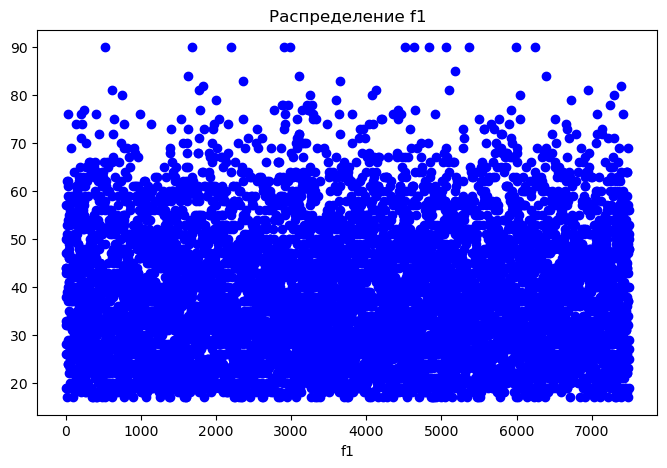

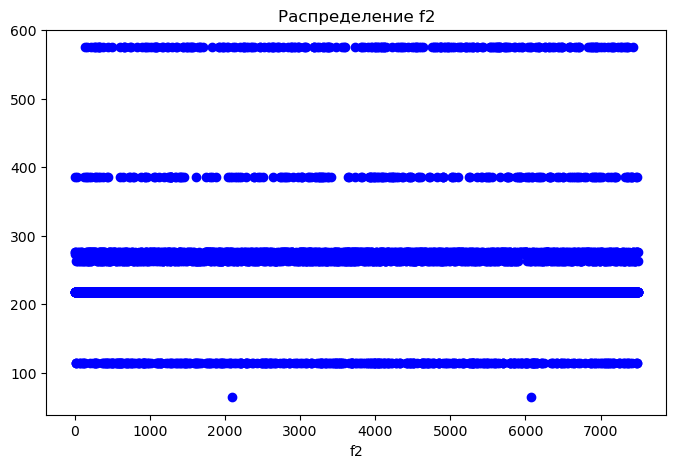

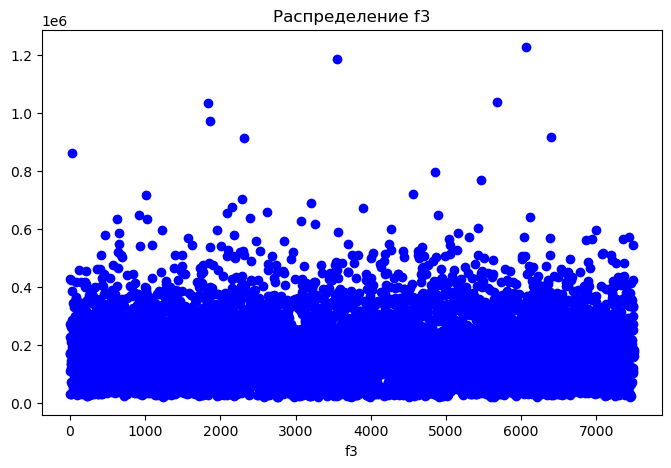

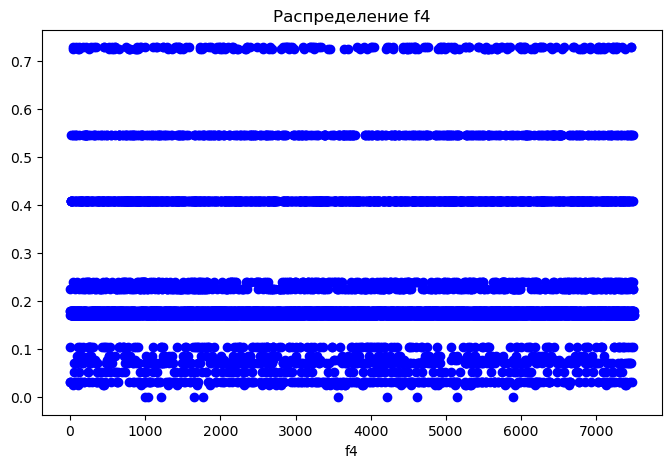

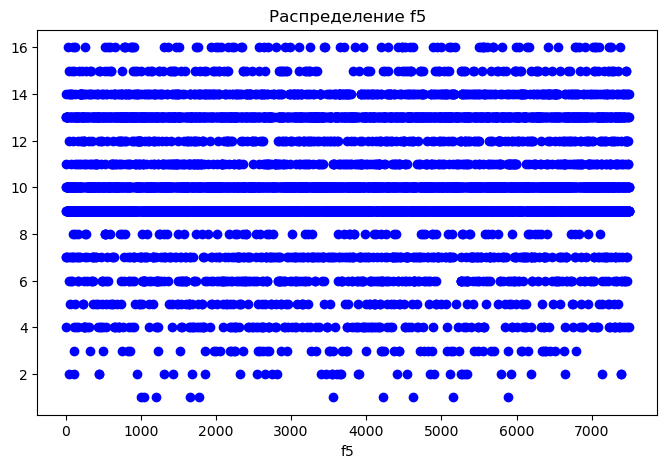

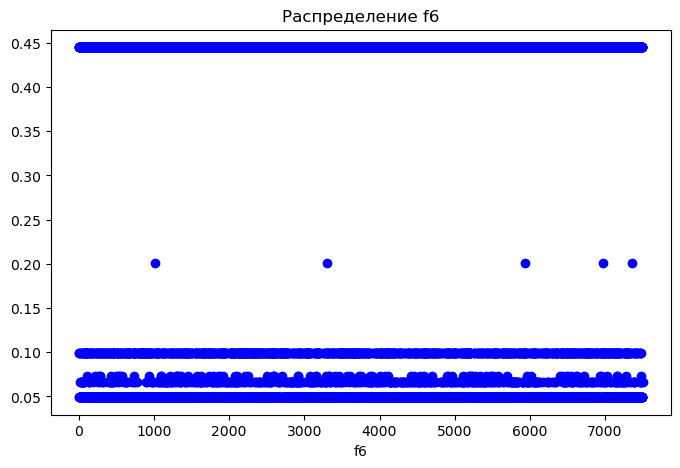

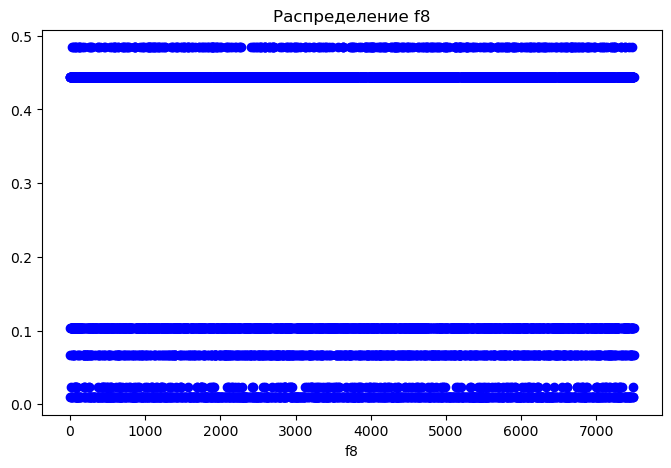

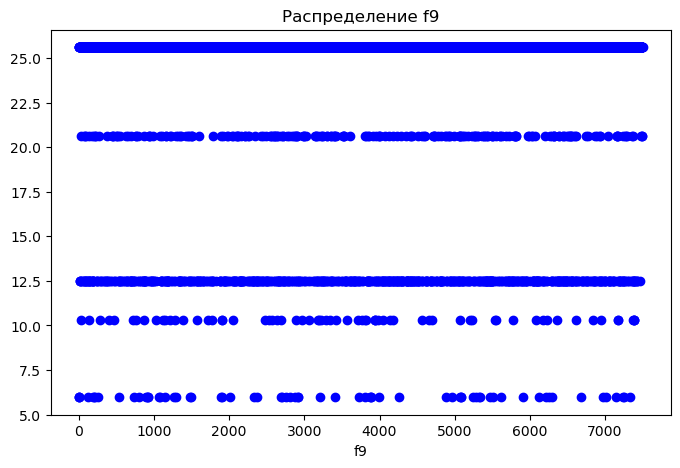

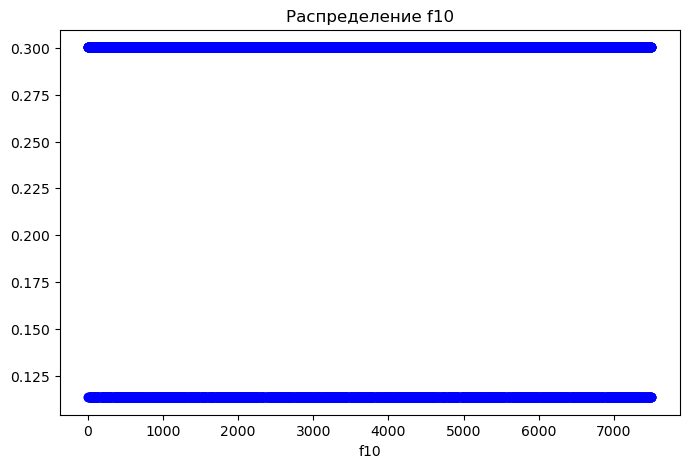

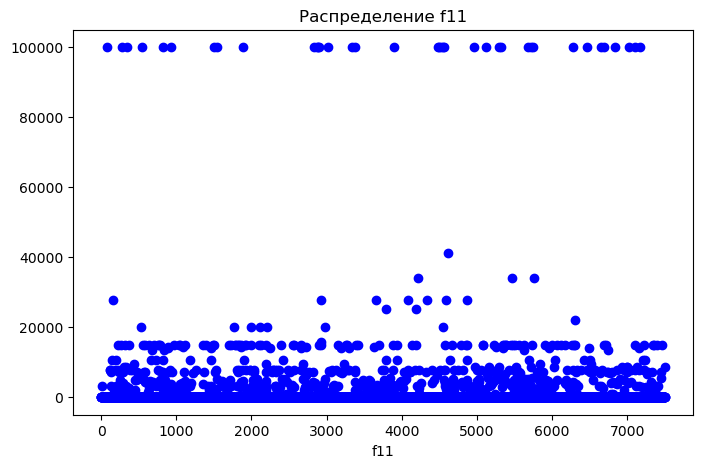

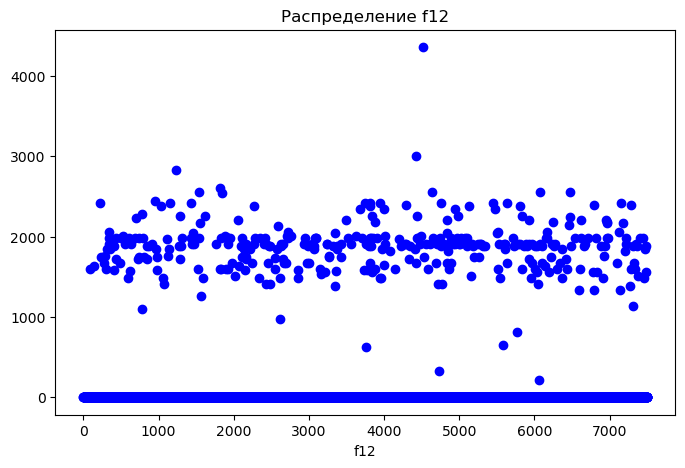

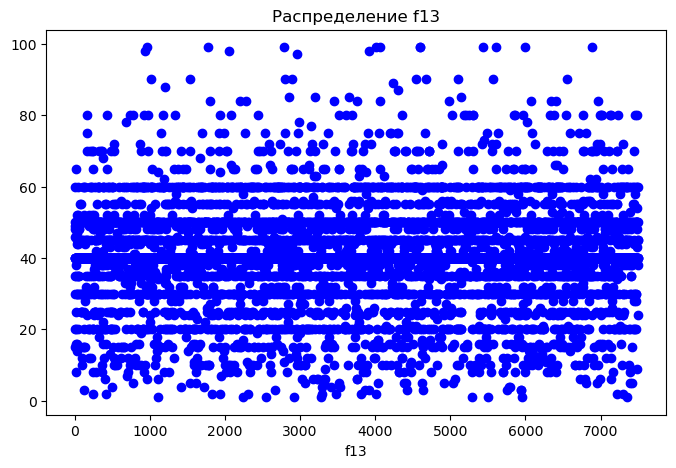

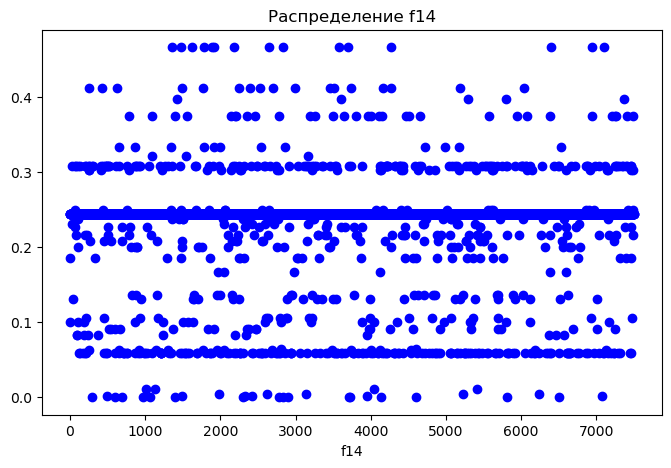

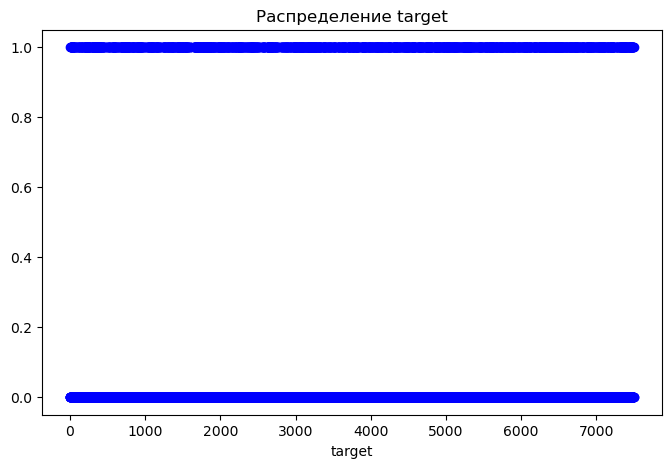

In [15]:
# Визуализируем распределиния значений колонок
for i in Xtrain.columns:    
    plt.figure(figsize=(8, 5))
    plt.scatter(Xtrain.index, Xtrain[i], color='b')
    plt.xlabel(i)
    
    plt.title(f'Распределение {i}');
    plt.show()

In [16]:
# По результатвм визуализации колонки f2, f4, f5, f6, f7, f8, f9, f10 - являются категориальными, представленными в 
# числовом виде. В колонках f1, f13, f14 видимых отклонений не выявлено. Колонки f3, f11,f12 рассмотрим более подробно
# Рассмотрим колонку f3
out = calculate_outliers(Xtrain, 'f3')
Xtrain_f3_out = Xtrain[(Xtrain.f3 > out[1]) | (Xtrain.f3 < out[0])].sort_values(by = 'f3')
Xtrain_f3_out

,f1,f2,f3,f4,f5,f6,f8,f9,f10,f11,f12,f13,f14,target
7230,41,218.593930,421871,0.171817,9,0.445026,0.444334,12.464986,0.300298,0.0,0,40,0.244418,1
2403,29,218.593930,423158,0.179322,10,0.049127,0.103024,25.606721,0.113590,0.0,0,40,0.244418,0
7493,27,218.593930,423250,0.179322,10,0.445026,0.444334,25.606721,0.300298,0.0,0,60,0.244418,0
6358,18,114.416476,423460,0.032491,7,0.049127,0.009499,25.606721,0.300298,0.0,0,36,0.244418,0
6671,67,273.648649,423561,0.179322,10,0.445026,0.444334,25.606721,0.300298,0.0,0,40,0.244418,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,43,218.593930,972354,0.179322,10,0.445026,0.444334,25.606721,0.300298,0.0,0,48,0.244418,0
1838,31,273.648649,1033222,0.179322,10,0.445026,0.444334,25.606721,0.300298,0.0,0,40,0.244418,0
5682,23,218.593930,1038553,0.171817,9,0.049127,0.103024,12.464986,0.300298,0.0,0,45,0.244418,0
3549,30,218.593930,1184622,0.179322,10,0.445026,0.444334,12.464986,0.300298,0.0,0,35,0.244418,0


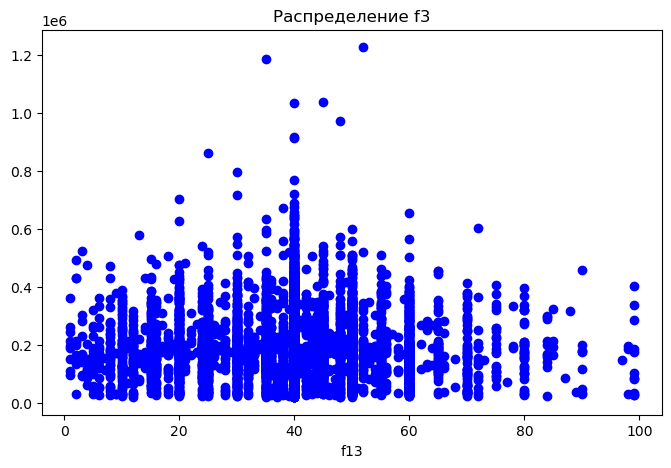

In [17]:
# Построим распределение f3 щтносительно f13
plt.figure(figsize=(8, 5))
plt.scatter(Xtrain.f13, Xtrain.f3, color='b')
plt.xlabel('f13')

plt.title('Распределение f3');
plt.show()

In [18]:
# Я считаю, что значения колонки f3 аномалиями не являются

In [19]:
# Рассмотрим колонку f3
out = calculate_outliers(Xtrain, 'f11')
Xtrain_f11_out = Xtrain[(Xtrain.f11 > out[1]) | (Xtrain.f11 < out[0])].sort_values(by = 'f11')
Xtrain_f11_out
# Значение f11 = 99999.0 явно выбивается из общего ряда

,f1,f2,f3,f4,f5,f6,f8,f9,f10,f11,f12,f13,f14,target
6379,38,273.648649,354591,0.171817,9,0.049127,0.066581,12.464986,0.113590,114.0,0,38,0.244418,0
5928,77,276.771005,145329,0.171817,9,0.049127,0.103024,25.606721,0.300298,401.0,0,20,0.244418,0
876,34,263.691684,284843,0.171817,9,0.049127,0.103024,12.464986,0.300298,594.0,0,60,0.244418,0
2150,18,218.593930,675421,0.053571,5,0.049127,0.009499,25.606721,0.300298,594.0,0,40,0.244418,0
1103,20,218.593930,196745,0.179322,10,0.049127,0.009499,25.606721,0.113590,594.0,0,16,0.244418,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,26,218.593930,256000,0.729323,15,0.445026,0.444334,25.606721,0.300298,99999.0,0,60,0.244418,1
7029,44,218.593930,332401,0.729323,15,0.445026,0.444334,25.606721,0.300298,99999.0,0,65,0.244418,1
7101,33,218.593930,170769,0.726190,16,0.098837,0.103024,25.606721,0.300298,99999.0,0,60,0.244418,1
7164,47,218.593930,168262,0.546366,14,0.066390,0.103024,25.606721,0.300298,99999.0,0,50,0.244418,1


In [20]:
Xtrain_f11_out = Xtrain[Xtrain.f11 == 99999 ]
Xtrain_f11_out
# Значение признака явно определяет целевую переменную, для этого значения создаим новую фичу, а значения в столбце f11 
# заполним модой

,f1,f2,f3,f4,f5,f6,f8,f9,f10,f11,f12,f13,f14,target
80,54,276.771005,269068,0.729323,15,0.445026,0.444334,20.627803,0.300298,99999.0,0,50,0.216216,1
276,65,575.396825,139272,0.408246,13,0.445026,0.444334,25.606721,0.300298,99999.0,0,60,0.244418,1
342,53,575.396825,263925,0.171817,9,0.445026,0.444334,25.606721,0.300298,99999.0,0,40,0.244418,1
537,52,218.593930,118025,0.408246,13,0.445026,0.444334,25.606721,0.300298,99999.0,0,50,0.244418,1
821,46,263.691684,222115,0.408246,13,0.098837,0.103024,25.606721,0.113590,99999.0,0,40,0.244418,1
927,36,218.593930,208358,0.729323,15,0.098837,0.103024,25.606721,0.300298,99999.0,0,45,0.244418,1
1506,22,276.771005,202920,0.171817,9,0.049127,0.066581,25.606721,0.113590,99999.0,0,40,0.100000,1
1538,26,218.593930,256000,0.729323,15,0.445026,0.444334,25.606721,0.300298,99999.0,0,60,0.244418,1
1891,51,218.593930,44000,0.546366,14,0.445026,0.484375,25.606721,0.113590,99999.0,0,50,0.244418,1
2836,38,218.593930,167140,0.729323,15,0.445026,0.444334,25.606721,0.300298,99999.0,0,70,0.244418,1


In [21]:
Xtrain['f15'] = Xtrain.f11.apply(lambda x: 1 if (x == 99999.0) else 0)
Xtrain

,f1,f2,f3,f4,f5,f6,f8,f9,f10,f11,f12,f13,f14,target,f15
0,50,218.593930,273536,0.104575,4,0.445026,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0,0
1,32,276.771005,173314,0.224684,11,0.445026,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0,0
2,38,218.593930,28887,0.032491,7,0.445026,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0,0
3,19,218.593930,427862,0.179322,10,0.049127,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0,0
4,44,218.593930,109339,0.032491,7,0.098837,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,48,218.593930,329778,0.171817,9,0.066372,0.066581,25.606721,0.113590,0.0,0,40,0.244418,0,0
7496,25,218.593930,104439,0.179322,10,0.049127,0.103024,25.606721,0.113590,0.0,0,50,0.244418,0,0
7497,50,218.593930,162632,0.171817,9,0.445026,0.444334,25.606721,0.300298,0.0,0,45,0.244418,0,0
7498,51,276.771005,174824,0.171817,9,0.049127,0.103024,25.606721,0.300298,8614.0,0,40,0.244418,1,0


In [22]:

Xtrain.loc[Xtrain.f11 == 99999.0, 'f11'] = Xtrain.f11.mode()[0]
Xtrain

,f1,f2,f3,f4,f5,f6,f8,f9,f10,f11,f12,f13,f14,target,f15
0,50,218.593930,273536,0.104575,4,0.445026,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0,0
1,32,276.771005,173314,0.224684,11,0.445026,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0,0
2,38,218.593930,28887,0.032491,7,0.445026,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0,0
3,19,218.593930,427862,0.179322,10,0.049127,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0,0
4,44,218.593930,109339,0.032491,7,0.098837,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,48,218.593930,329778,0.171817,9,0.066372,0.066581,25.606721,0.113590,0.0,0,40,0.244418,0,0
7496,25,218.593930,104439,0.179322,10,0.049127,0.103024,25.606721,0.113590,0.0,0,50,0.244418,0,0
7497,50,218.593930,162632,0.171817,9,0.445026,0.444334,25.606721,0.300298,0.0,0,45,0.244418,0,0
7498,51,276.771005,174824,0.171817,9,0.049127,0.103024,25.606721,0.300298,8614.0,0,40,0.244418,1,0


In [23]:
# Рассмотрим колонку f12
out = calculate_outliers(Xtrain, 'f12')
Xtrain_f12_out = Xtrain[(Xtrain.f12 > out[1]) | (Xtrain.f12 < out[0])].sort_values(by = 'f12')
Xtrain_f12_out

,f1,f2,f3,f4,f5,f6,f8,f9,f10,f11,f12,f13,f14,target,f15
6062,37,218.593930,262409,0.546366,14,0.098837,0.066581,25.606721,0.113590,0.0,213,45,0.244418,0,0
4732,52,218.593930,122109,0.171817,9,0.049127,0.066581,25.606721,0.113590,0.0,323,40,0.244418,0,0
3756,43,263.691684,118600,0.408246,13,0.098837,0.066581,25.606721,0.113590,0.0,625,40,0.244418,0,0
5586,57,218.593930,34269,0.171817,9,0.066372,0.066581,25.606721,0.300298,0.0,653,42,0.244418,1,0
5767,69,273.648649,159191,0.179322,10,0.066372,0.103024,25.606721,0.113590,0.0,810,38,0.244418,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4641,37,575.396825,107164,0.072072,6,0.049127,0.103024,25.606721,0.300298,0.0,2559,50,0.244418,1,0
1818,51,218.593930,153870,0.179322,10,0.445026,0.444334,25.606721,0.300298,0.0,2603,40,0.244418,0,0
1237,38,276.771005,164526,0.729323,15,0.049127,0.103024,25.606721,0.300298,0.0,2824,45,0.244418,1,0
4429,41,218.593930,70037,0.179322,10,0.049127,0.066581,25.606721,0.300298,0.0,3004,60,0.307692,1,0


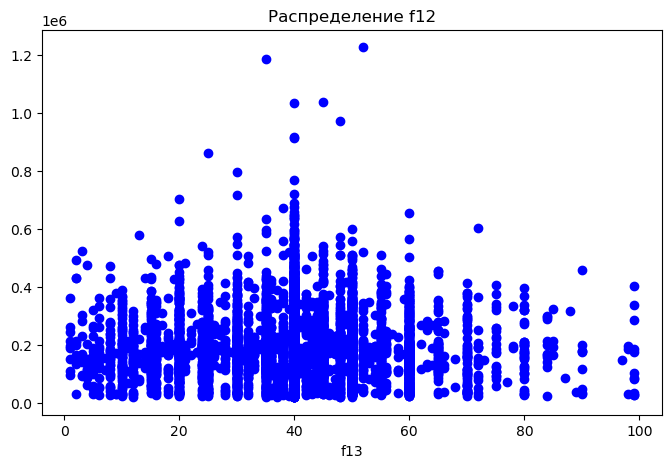

In [24]:
# Построим распределение f12 щтносительно f13
plt.figure(figsize=(8, 5))
plt.scatter(Xtrain.f13, Xtrain.f3, color='b')
plt.xlabel('f13')

plt.title('Распределение f12');
plt.show()

In [25]:
# # Я считаю, что значения колонки f12 аномалиями не являются

In [26]:
# Удалим дубликаты
Xtrain.drop_duplicates(inplace=True)
Xtrain

,f1,f2,f3,f4,f5,f6,f8,f9,f10,f11,f12,f13,f14,target,f15
0,50,218.593930,273536,0.104575,4,0.445026,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0,0
1,32,276.771005,173314,0.224684,11,0.445026,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0,0
2,38,218.593930,28887,0.032491,7,0.445026,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0,0
3,19,218.593930,427862,0.179322,10,0.049127,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0,0
4,44,218.593930,109339,0.032491,7,0.098837,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,48,218.593930,329778,0.171817,9,0.066372,0.066581,25.606721,0.113590,0.0,0,40,0.244418,0,0
7496,25,218.593930,104439,0.179322,10,0.049127,0.103024,25.606721,0.113590,0.0,0,50,0.244418,0,0
7497,50,218.593930,162632,0.171817,9,0.445026,0.444334,25.606721,0.300298,0.0,0,45,0.244418,0,0
7498,51,276.771005,174824,0.171817,9,0.049127,0.103024,25.606721,0.300298,8614.0,0,40,0.244418,1,0


In [27]:
# Выполним те же преобразования для тестовой группы
Xtest.drop(columns=['f7'], inplace=True)
Xtest.f2 = Xtest.f2.fillna(218.593930)
Xtest.f11 = Xtest.f11.fillna(0.0)
Xtest['f15'] = Xtest.f11.apply(lambda x: 1 if (x == 99999.0) else 0)
Xtest.loc[Xtest.f11 == 99999.0, 'f11'] = Xtest.f11.mode()
Xtest.drop_duplicates(inplace=True)
Xtest

,f1,f2,f3,f4,f5,f6,f8,f9,f10,f11,f12,f13,f14,target,f15
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,23.893333,0.238933,0.0,1740,20,0.238933,0,0
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,23.893333,0.238933,0.0,0,40,0.238933,0,0
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,23.893333,0.238933,0.0,0,20,0.238933,0,0
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,23.893333,0.238933,0.0,0,20,0.238933,0,0
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,23.893333,0.238933,0.0,0,40,0.238933,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,40,238.933333,220589,0.238933,10,0.238933,0.238933,23.893333,0.238933,0.0,0,40,0.238933,1,0
2496,54,238.933333,165278,0.238933,10,0.238933,0.238933,23.893333,0.238933,0.0,0,40,0.238933,1,0
2497,44,238.933333,398473,0.238933,10,0.238933,0.238933,23.893333,0.238933,0.0,0,70,0.238933,1,0
2498,35,238.933333,183898,0.238933,11,0.238933,0.238933,23.893333,0.238933,7298.0,0,50,0.238933,1,0


In [28]:
Xtrain[Xtrain.f11.isna()]

,f1,f2,f3,f4,f5,f6,f8,f9,f10,f11,f12,f13,f14,target,f15


### 3. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче? 

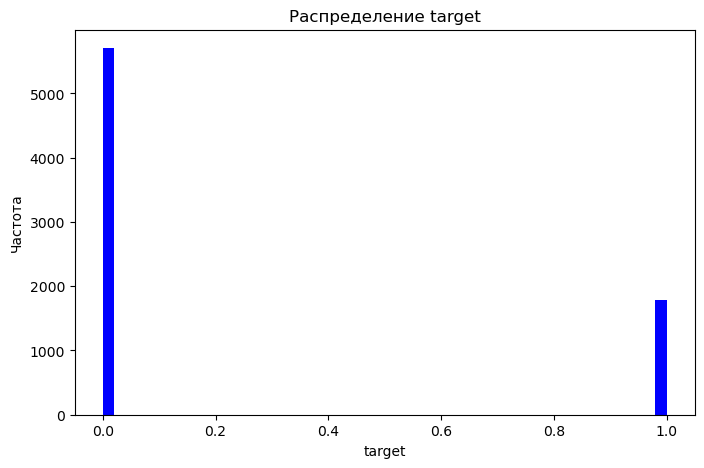

In [29]:
# Ваш код здесь
plt.figure(figsize=(8, 5))
plt.hist(Xtrain.target, color='blue', bins = 50)
plt.xlabel('target')
plt.ylabel('Частота')
plt.title('Распределение target');

In [30]:
# Целевая переменная распределена не равномерна, метрика accuracy не подходит для оценки качества. Т.к. по условиям задачи 
# неизвестно, что важнее точность или полнота, будем использовать метрику f1

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test); 
- обучите KNN, LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test) и вычислите значение метрики f1.

In [31]:
from sklearn.metrics import f1_score

X = Xtrain.drop('target', axis=1)
y = Xtrain['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print(f'Метрика f1 логистической регрессии: {f1_score(y_test,pred_logreg)}')
print(f'Метрика f1 метода ближайших соседей: {f1_score(y_test,pred_knn)}')
print(f'Метрика f1 метода опорных векторов: {f1_score(y_test,pred_svc)}')
# Ваш код здесь

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Метрика f1 логистической регрессии: 0.3232876712328767
Метрика f1 метода ближайших соседей: 0.3042328042328042
Метрика f1 метода опорных векторов: 0.05235602094240837


### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете подбирать гиперпараметры моделей (лучше это делать по кросс-валидации на Train, то есть с помощью использования GridSearchCV на Train);
- можете задавать class_weights;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

#### Логистическая регрессия

In [32]:
# Ваш код здесь
from sklearn.model_selection import GridSearchCV
parametrs = { 'max_iter': [500],
              'C': range(1,50, 1),
            'class_weight' : ['balanced', 'None']}
grid = GridSearchCV(logreg, parametrs, cv=5, scoring = 'f1')
grid.fit(X_train, y_train)
print('Лучшие параметры логистической регрессии')
grid.best_params_

Лучшие параметры логистической регрессии


{'C': 22, 'class_weight': 'balanced', 'max_iter': 500}

In [33]:
logreg1 = LogisticRegression(max_iter=500, C=22, class_weight = 'balanced')
logreg1.fit(X_train, y_train)
pred_logreg1 = logreg1.predict(X_test)
print(f'Метрика f1 логистической регрессии: {f1_score(y_test,pred_logreg1)}')

Метрика f1 логистической регрессии: 0.44542772861356933


#### Метод ближайших соседей

In [34]:
parametrs = { 'n_neighbors': range(3,20,1),
              'weights': ['uniform', 'distance'],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid = GridSearchCV(knn, parametrs, cv=5, scoring = 'f1')
grid.fit(X_train, y_train)
print('Лучшие параметры метода ближайших соседей')
grid.best_params_

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Лучшие параметры метода ближайших соседей


{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

In [35]:
knn1 = KNeighborsClassifier(weights= 'distance', n_neighbors=3, algorithm = 'auto')
knn1.fit(X_train, y_train)
pred_knn1 = knn1.predict(X_test)
print(f'Метрика f1 метода ближайших соседей: {f1_score(y_test,pred_knn1)}')

Метрика f1 метода ближайших соседей: 0.35598705501618116


#### Метод опорных элементов 

In [37]:
parametrs = { 'kernel' : ['poly', 'rbf', 'sigmoid'],
              'class_weight' : ['balanced', 'None']
            }
grid = GridSearchCV(svc, parametrs, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print('Лучшие параметры метода опорных элементов')
grid.best_params_

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 718, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class_weight, classes=cls, y=

Лучшие параметры метода опорных элементов


{'class_weight': 'balanced', 'kernel': 'sigmoid'}

In [38]:
svc1 = SVC(kernel='sigmoid', class_weight='balanced')
svc1.fit(X_train, y_train)
pred_svc1 = svc1.predict(X_test)
print(f'Метрика f1 метода опорных векторов: {f1_score(y_test,pred_svc1)}')

Метрика f1 метода опорных векторов: 0.355421686746988


In [41]:
# Для улучшения моделей попробуем преобразовать категориальные переменные
category = ['f2', 'f4', 'f5', 'f6', 'f8', 'f9', 'f10']
data = Xtrain[category]
ohe = OneHotEncoder(sparse=False)
ohe.fit(data)
ohe_category = ohe.transform(data)
Xtrain[ohe.get_feature_names()] = ohe_category
Xtrain.drop(columns=category, inplace=True)

data1 = Xtest[category]
ohe = OneHotEncoder(sparse=False)
ohe.fit(data1)
ohe_category = ohe.transform(data1)
Xtest[ohe.get_feature_names()] = ohe_category
Xtest.drop(columns=category, inplace=True)

Xtrain

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,f1,f3,f11,f12,f13,f14,target,f15,x0_64.2590702793375,x0_114.41647597254,...,x4_0.1030240902101486,x4_0.4443336656696577,x4_0.484375,x5_5.97014925373134,x5_10.29411764705882,x5_12.46498599439775,x5_20.62780269058296,x5_25.606720597386428,x6_0.1135902636916835,x6_0.3002979145978153
0,50,273536,0.0,0,49,0.100000,0,0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,32,173314,0.0,0,60,0.244418,0,0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,38,28887,0.0,0,50,0.244418,0,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,19,427862,0.0,0,35,0.244418,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,44,109339,0.0,0,46,0.185185,0,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,48,329778,0.0,0,40,0.244418,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7496,25,104439,0.0,0,50,0.244418,0,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7497,50,162632,0.0,0,45,0.244418,0,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7498,51,174824,8614.0,0,40,0.244418,1,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [42]:
X = Xtrain.drop('target', axis=1)
y = Xtrain['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

logreg = LogisticRegression(max_iter=500, C=22, class_weight = 'balanced')
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

knn = KNeighborsClassifier(weights= 'distance', n_neighbors=3, algorithm = 'auto')
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

svc = SVC(kernel='sigmoid', class_weight='balanced')
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print(f'Метрика f1 логистической регрессии: {f1_score(y_test,pred_logreg)}')
print(f'Метрика f1 метода ближайших соседей: {f1_score(y_test,pred_knn)}')
print(f'Метрика f1 метода опорных векторов: {f1_score(y_test,pred_svc)}')

Метрика f1 логистической регрессии: 0.420527441197434
Метрика f1 метода ближайших соседей: 0.35233160621761656
Метрика f1 метода опорных векторов: 0.35429262394195893


### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [45]:
# Ваш код здесь
# Т.к. введение новых переменных не дало ожидаемого результата не будем этого делать с тестовыми данными
Xtest = pd.read_csv("TestData.csv")
Xtest.drop(columns=['f7'], inplace=True)
Xtest.f2 = Xtest.f2.fillna(218.593930)
Xtest.f11 = Xtest.f11.fillna(0.0)
Xtest['f15'] = Xtest.f11.apply(lambda x: 1 if (x == 99999.0) else 0)
Xtest.loc[Xtest.f11 == 99999.0, 'f11'] = Xtest.f11.mode()[0]
Xtest.drop_duplicates(inplace=True)

X = Xtest.drop('target', axis=1)
y = Xtest['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

logreg = LogisticRegression(max_iter=500, C=22, class_weight = 'balanced')
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)





print(f'Метрика f1 логистической регрессии: {f1_score(y_test,pred_logreg)}')


Метрика f1 логистической регрессии: 0.589622641509434


### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [46]:
Xtrain = pd.read_csv("TrainData.csv")
Xtrain.drop(columns=['f7'], inplace=True)
Xtrain.f2 = Xtrain.f2.fillna(218.593930)
Xtrain.f11 = Xtrain.f11.fillna(0.0)
Xtrain['f15'] = Xtrain.f11.apply(lambda x: 1 if (x == 99999.0) else 0)
Xtrain.loc[Xtrain.f11 == 99999.0, 'f11'] = Xtrain.f11.mode()[0]
Xtrain.drop_duplicates(inplace=True)

X = Xtrain.drop('target', axis=1)
y = Xtrain['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

logreg = LogisticRegression(max_iter=500, C=22, class_weight = 'balanced')
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)


svc = SVC(kernel='sigmoid', class_weight='balanced')
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [48]:
print(pred_logreg, len(pred_logreg))

[0 0 0 ... 1 0 0] 2250


In [57]:
# Ваш код здесь
for a in range(1,10):
    pred_final = a * pred_logreg + (1 - a) * pred_svc
    pred_final = [0 if b <= 0 else 1 for b in pred_final]
    
    print(f'Метрика f1 двух моделей: {f1_score(y_test,pred_final)}')

Метрика f1 двух моделей: 0.44542772861356933
Метрика f1 двух моделей: 0.44542772861356933
Метрика f1 двух моделей: 0.44542772861356933
Метрика f1 двух моделей: 0.44542772861356933
Метрика f1 двух моделей: 0.44542772861356933
Метрика f1 двух моделей: 0.44542772861356933
Метрика f1 двух моделей: 0.44542772861356933
Метрика f1 двух моделей: 0.44542772861356933
Метрика f1 двух моделей: 0.44542772861356933


### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке? 
- Ваша модель переобучилась, недообучилась или обучилась как надо?

In [58]:
# Ваш текст здесь
# Для улучшения baseline-моделей я провел работу с недостающими значениями и выбросами, использовал несколько алгоритимов,
# настраивал эти алгоритмы, а также использовал перекрестную проверку при выборе оптимальных параметров. Смешивание алгоритмов
# не дало существенных результатов (здесь я не уверен, что правильно понял задание). Максимальный результат на тестовых данных
# 0.445, что выше первичного результата (0.323). На тестовых данных значение получилось еще выше(0.5896), что может говорить 
# о переобученности модели, т.к. результат не стабилен, с другой стороны модель отработала даже лучше, чем при тесте.


Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.